# 9. Local features – corner detectors


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_image(image, title="", cmap=""):
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.show()

### **a)** Use the **Harris** corner detector to detect the corners in one or more images of your choice. Try different parameters, namely, neighborhood size, aperture for the Sobel operator and Harris detector free parameter.


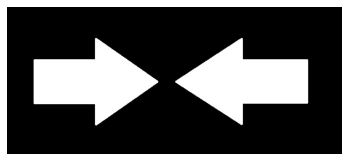

In [3]:
image = cv2.imread("Images/corners_01.jpg")
original_image = image.copy()

show_image(image)

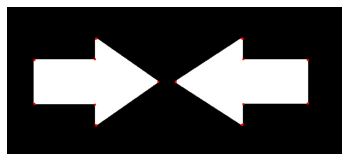

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

neighbourhood = 2
aperture = 3
free_param = 0.04

harris = cv2.cornerHarris(gray, neighbourhood, aperture, free_param)

# Result is dilated for marking the corners, not important
harris = cv2.dilate(harris, None)

# Threshold for an optimal value, it may vary depending on the image
threshold = 0.01

image[harris > threshold * harris.max()] = [0, 0, 255]

# Convert to RGB for plotting with matplotlib
out = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

show_image(out)

### **b)** Use the **Shi-Tomasi** corner detector to detect the corners in the same images. Try different parameters, namely, block size, and aperture for the Sobel operator; compare the results with those of Harris detector for the equivalent parameters; notice that the Shi-Tomasi implementation has more parameters than Harris implementation.

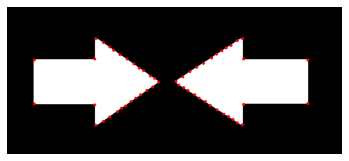

In [5]:
max_corners = 200
quality = 0.01
mindist = 10
corners = cv2.goodFeaturesToTrack(gray, max_corners, quality, mindist, blockSize=neighbourhood, k=free_param)
corners = np.int0(corners)
copy = image.copy()

for i in corners:
    x, y = i.ravel()
    cv2.circle(copy, (x, y), 3, 255, -1)
    
show_image(copy)

### **c)** Use the FAST corner detector to detect the corners in the same images.

Threshold: 10
NMS: True
Neighborhood: 2
Total Keypoints with NMS: 14


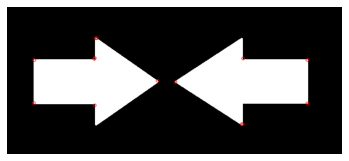

Total Keypoints without NMS: 92


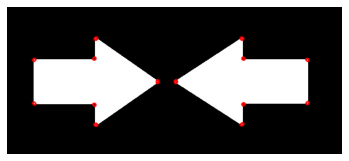

In [6]:
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# Find and draw the keypoints
kp = fast.detect(original_image, None)
image_3 = cv2.drawKeypoints(original_image, kp, None, color=(255, 0, 0))

# Print all default params
print(f"Threshold: {fast.getThreshold()}")
print(f"NMS: {fast.getNonmaxSuppression()}")
print(f"Neighborhood: {fast.getType()}")
print(f"Total Keypoints with NMS: {len(kp)}")

show_image(image_3)

# Disable NMS
fast.setNonmaxSuppression(0)
kp = fast.detect(original_image, None)

print(f"Total Keypoints without NMS: {len(kp)}")

image_4 = cv2.drawKeypoints(original_image, kp, None, color=(255, 0, 0))

show_image(image_4)

### **d)** Resize the images, downsizing them to 1/4 of the original size and reapply all the corner detectors. Compare the results with each other and with those that you have obtained previously.


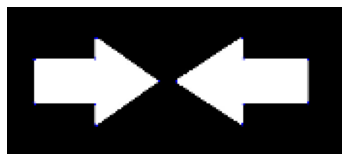

In [14]:
scale_percent = 25 # Percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)

resized_image = cv2.resize(image, (width, height))

show_image(resized_image)